In [20]:
import pandas as pd
from collections import Counter
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('news-utf8.tsv', sep='\t')

In [3]:
# Tokenize the text into words (split by whitespace)
df['Words_Title'] = df['title'].apply(lambda x: re.findall(r'\b\w+\b', str(x).lower()))


In [4]:
# Tokenize the text into words (split by whitespace)
df['Words_Text'] = df['text'].apply(lambda x: re.findall(r'\b\w+\b', str(x).lower()))

In [5]:
# Count the occurrences of distinct words
title_counts = Counter(word for words in df['Words_Title'] for word in words)

In [6]:
# Count the occurrences of distinct words
text_counts = Counter(word for words in df['Words_Text'] for word in words)

In [7]:
# Convert the word counts to a DataFrame
title_counts_df = pd.DataFrame.from_dict(title_counts, orient='index', columns=['Count Title'])

# Reset the index and add an index label
title_counts_df.reset_index(inplace=True)
title_counts_df.rename(columns={'index': 'Title'}, inplace=True)

In [8]:
# Convert the word counts to a DataFrame
text_counts_df = pd.DataFrame.from_dict(text_counts, orient='index', columns=['Count Text'])

# Reset the index and add an index label
text_counts_df.reset_index(inplace=True)
text_counts_df.rename(columns={'index': 'Text'}, inplace=True)

In [9]:
# Sort the words by count in descending order
title_counts_df = title_counts_df.sort_values(by='Count Title', ascending=False)

In [10]:
# Sort the words by count in descending order
text_counts_df = text_counts_df.sort_values(by='Count Text', ascending=False)

In [ ]:
title_counts_df.head()

In [ ]:
text_counts_df.head(5)

In [ ]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

stop_words_list = list(ENGLISH_STOP_WORDS)




In [11]:
# List of words to exclude
words_to_exclude = ['thus', 'describe', 'whenever', 'besides', 'front', 'nevertheless', 'against', 'could', 'while', 'is', 'moreover', 'each', 'during', 'forty', 'due', 'see', 'whereupon', 'being', 'seeming', 'often', 'namely', 'but', 'go', 'up', 'mine', 'has', 'very', 'must', 'are', 'bill', 'anyone', 'anything', 'former', 'all', 'whom', 'from', 'becoming', 'ourselves', 'anyway', 'move', 'found', 'take', 'than', 'almost', 'a', 'side', 'whither', 'detail', 'everywhere', 'where', 'un', 'somehow', 'back', 'his', 'how', 'then', 'have', 'eleven', 'this', 'if', 'whence', 'five', 'which', 'thick', 'eg', 'eight', 'afterwards', 'now', 'via', 'ie', 'everything', 'rather', 'serious', 'anyhow', 'an', 'who', 'bottom', 'would', 'becomes', 'six', 're', 'yourself', 'others', 'same', 'itself', 'yet', 'thin', 'interest', 'meanwhile', 'per', 'nine', 'neither', 'down', 'whereafter', 'ours', 'only', 'am', 'hence', 'be', 'system', 'myself', 'her', 'hers', 'for', 'therefore', 'hereafter', 'without', 'mostly', 'name', 'both', 'part', 'thereupon', 'fire', 'within', 'him', 'they', 'along', 'about', 'whole', 'beside', 'cannot', 'do', 'please', 'still', 'whereby', 'and', 'may', 'more', 'wherein', 'whereas', 'above', 'sometime', 'was', 'throughout', 'someone', 'already', 'mill', 'several', 'among', 'empty', 'twelve', 'although', 'with', 'what', 'made', 'beforehand', 'become', 'put', 'their', 'somewhere', 'after', 'never', 'into', 'it', 'sometimes', 'themselves', 'whether', 'also', 'the', 'inc', 'such', 'many', 'so', 'under', 'done', 'fifty', 'to', 'perhaps', 'show', 'well', 'there', 'other', 'seemed', 'hereby', 'toward', 'once', 'nowhere', 'between', 'your', 'you', 'whatever', 'hundred', 'in', 'should', 'out', 'less', 'again', 'another', 'everyone', 'that', 'least', 'yours', 'next', 'three', 'nobody', 'fifteen', 'fill', 'latterly', 'much', 'thereafter', 'though', 'two', 'thereby', 'until', 'seems', 'cry', 'sincere', 'will', 'onto', 'became', 'across', 'cant', 'over', 'formerly', 'himself', 'on', 'give', 'therein', 'upon', 'four', 'why', 'might', 'ten', 'nor', 'otherwise', 'beyond', 'first', 'top', 'not', 'further', 'before', 'most', 'of', 'sixty', 'noone', 'amount', 'none', 'these', 'anywhere', 'some', 'co', 'here', 'elsewhere', 'one', 'by', 'ever', 'twenty', 'something', 'he', 'hereupon', 'its', 'at', 'else', 'around', 'etc', 'own', 'together', 'because', 'call', 'had', 'every', 'find', 'my', 'however', 'as', 'behind', 'thence', 'amongst', 'always', 'indeed', 'nothing', 'even', 'seem', 'either', 'our', 'off', 'we', 'amoungst', 'except', 'ltd', 'can', 'through', 'when', 'us', 'thru', 'de', 'last', 'were', 'below', 'couldnt', 'herein', 'no', 'those', 'been', 'she', 'enough', 'towards', 'whose', 'latter', 'too', 'wherever', 'full', 'con', 'keep', 'whoever', 'third', 'yourselves', 'alone', 'me', 'get', 'herself', 'them', 'since', 'i', 'few', 'hasnt', 'any', 'or']  # Replace with your list of words

# Use boolean indexing to filter and drop rows containing words from 'Title'
filtered_title_df = title_counts_df[~title_counts_df['Title'].str.contains('|'.join(words_to_exclude), case=False, na=False)]

filtered_title_df.head()


,Title,Count Title
4,s,1431
17,trump,1115
40,new,280
145,t,272
109,2016,214


In [12]:
# Use boolean indexing to filter and drop rows containing words from 'Title'
filtered_text_df = text_counts_df[~text_counts_df['Text'].str.contains('|'.join(words_to_exclude), case=False, na=False)]

filtered_text_df.head()

,Text,Count Text
46,s,61383
100,trump,22329
102,t,16053
58,people,11427
11,new,9221


In [13]:
# Use str.contains() with a regular expression to find rows containing numbers
rows_with_numbers = filtered_text_df[filtered_text_df['Text'].str.contains(r'\d', na=False)]

# Use the boolean mask to drop the rows with numbers from the original DataFrame
filtered_text_df = filtered_text_df.drop(index=rows_with_numbers.index)
filtered_text_df.head()

,Text,Count Text
46,s,61383
100,trump,22329
102,t,16053
58,people,11427
11,new,9221


In [14]:
# Use str.contains() with a regular expression to find rows containing numbers
rows_with_numbers = filtered_title_df[filtered_title_df['Title'].str.contains(r'\d', na=False)]

# Use the boolean mask to drop the rows with numbers from the original DataFrame
filtered_title_df = filtered_title_df.drop(index=rows_with_numbers.index)
filtered_title_df.head()

,Title,Count Title
4,s,1431
17,trump,1115
40,new,280
145,t,272
106,news,136


In [15]:
filtered_title_df = filtered_title_df[filtered_title_df['Title'].str.len() > 2]
filtered_title_df.head(20)

,Title,Count Title
17,trump,1115
40,new,280
106,news,136
119,cruz,116
494,vote,74
506,voters,74
1242,people,70
870,poll,59
517,jeb,55
502,ted,53


In [16]:
filtered_text_df = filtered_text_df[filtered_text_df['Text'].str.len() > 2]
filtered_text_df.head(20)

,Text,Count Text
100,trump,22329
58,people,11427
11,new,9221
226,news,4409
872,voters,3958
571,vote,3509
1021,cruz,3101
1071,need,2548
118,left,2184
712,john,2155


In [ ]:
!pip install wordcloud

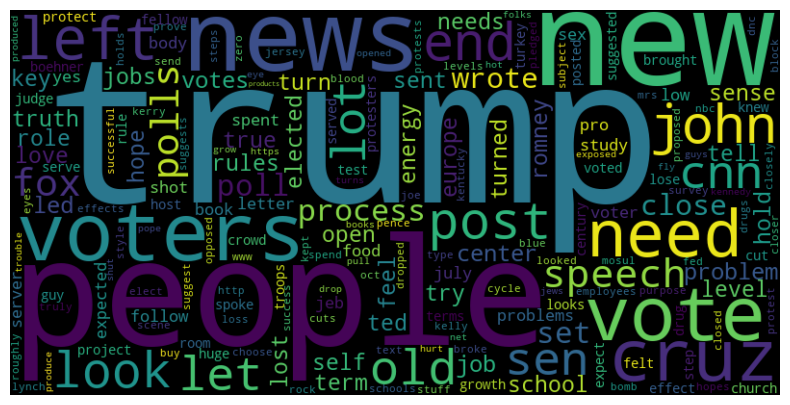

In [21]:
# Create a dictionary mapping words to their respective counts
word_count_dict = dict(zip(filtered_text_df['Text'], filtered_text_df['Count Text']))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(word_count_dict)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

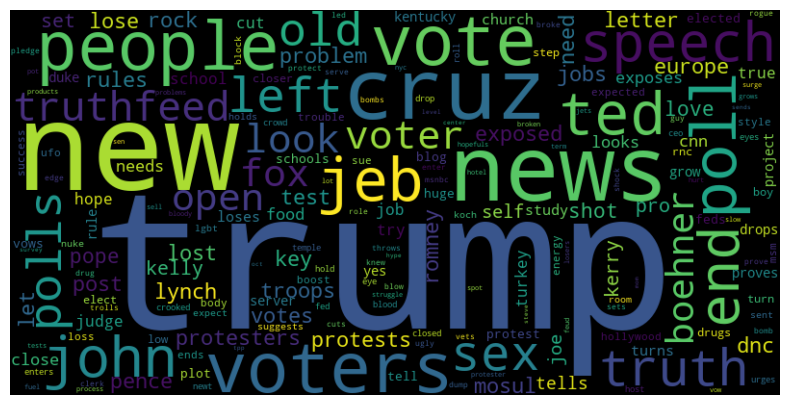

In [22]:
# Create a dictionary mapping words to their respective counts
word_count_dict = dict(zip(filtered_title_df['Title'], filtered_title_df['Count Title']))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(word_count_dict)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()